In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib
import matplotlib.patches as mpatches


In [2]:
hmm_track = pd.read_csv('../annotations/GM12878.csv')
hmm_track.head()

,chrom,start,end,weight,GC,E1,E2,E3,binary,HMM2,HMM3,HMM4,HMM5,HMM6,HMM5_2
0,chr1,0,50000,NaN,0.484250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,50000,100000,NaN,0.376740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,100000,150000,NaN,0.429960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,150000,200000,NaN,0.447314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,200000,250000,NaN,0.410796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pallete={ 'HMM3':np.array([8, 5, 2, 4, 4, 4]), 'binary': np.array([2, 8, 5,5,5,5]), 'HMM5_2': np.array([8, 6, 5,3,2,4])}
names = {'HMM3': ['A', 'M', 'B', 'N'], 'HMM5_2':['A', 'Maa', 'M', 'Mbb', 'B', 'N']}

In [4]:
def plot_track(chrom, hmm, start, end):
    plt.figure(figsize=(20, 4))
    y_sig = hmm_track[hmm_track.chrom == chrom][hmm].values
    y0 = np.tile(y_sig[start:end].reshape(1,-1), (2, 1))
    y0[y0!=y0] = 5
    y0=y0.astype(int)
    y0_c = pallete[hmm][y0]
    im = plt.imshow(y0_c,cmap="RdYlBu", vmin=0, vmax=10, aspect='auto')
    values = pallete[hmm]
    colors = [ im.cmap(im.norm(value)) for value in values]
    patches = [ mpatches.Patch(color=colors[i], label=names[hmm][i] ) for i in range(len(names[hmm])) ]
    plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

    plt.axis('off')

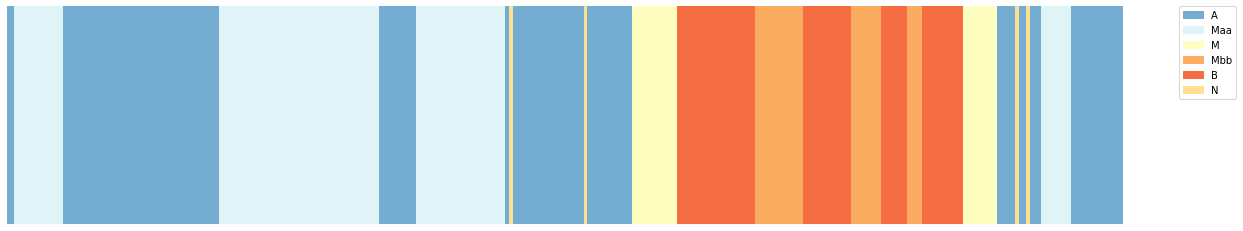

In [5]:
chrom = 'chr19'
hmm = 'HMM5_2'
start, end = 600, 900
plot_track(chrom, hmm, start, end)

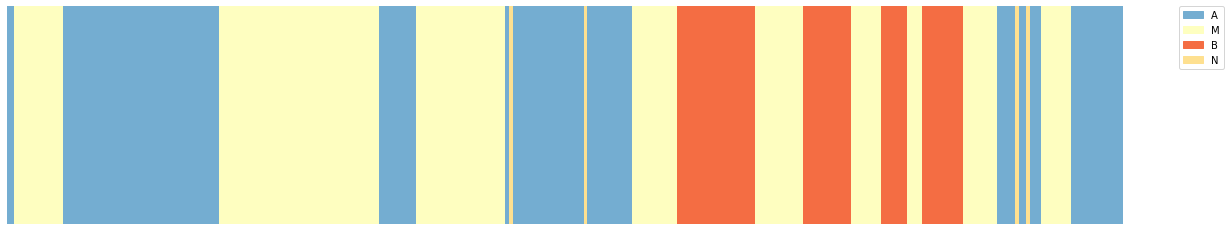

In [6]:
chrom = 'chr19'
hmm = 'HMM3'
start, end = 600, 900
plot_track(chrom, hmm, start, end)